**<h1><center>SMS SPAM PREDICTION</center></h1>**
<h3><center>Mathan Raj Olaganathan</center>
<center>12/02/2020</center></h3>

## Table of Contents

<div  style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a>

2. <a href="#item2">Data</a>

3. <a href="#item3">Exploratory Data Analysis</a>

4. <a href="#item4">Data Preprocessing</a>

5. <a href="#item5">WordCloud</a>

6. <a href='#item6'>Model using ML Algorithms</a>

7. <a href='#item7'>Model using Deep Learning</a>

</font>
</div>

<a id='item1'></a>

## 1.Introduction

### 1.1 Background

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

###1.3 Problem Statement

Build a prediction model that will accurately classify which texts are spam

## 2.Data

The dataset is available at https://www.kaggle.com/uciml/sms-spam-collection-dataset

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

### 2.1Loading the data

In [180]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mathanraj","key":"8de696e0ab4906782b2a37858ff26177"}'}

In [181]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [182]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [183]:
!unzip sms-spam-collection-dataset.zip 

Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: spam.csv                


importing libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords
import re
import string
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [185]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
df = pd.read_csv('spam.csv',encoding='ISO-8859–1')

In [187]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Lets rename the column name

In [0]:
df.columns=['label','text','v1','v2','v3']

In [190]:
df.head()

,label,text,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df['label_num'] = df['label'].map({'ham':0,'spam':1})

In [192]:
df.head()

,label,text,v1,v2,v3,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


Replace the nan values

In [0]:
df.fillna("", inplace=True)

In [194]:
df.head()

,label,text,v1,v2,v3,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",,,,0
1,ham,Ok lar... Joking wif u oni...,,,,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,1
3,ham,U dun say so early hor... U c already then say...,,,,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   text       5572 non-null   object
 2   v1         5572 non-null   object
 3   v2         5572 non-null   object
 4   v3         5572 non-null   object
 5   label_num  5572 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 261.3+ KB


In [0]:
df['text'] = df['text']+" "+df['v1']+" "+df['v2']+" "+df['v3']

Dropping v1, v2 adn v3 columns as we don't require them anymore

In [0]:
df.drop(['v1','v2','v3'],inplace=True,axis=1)

In [198]:
df.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<a id='item3'></a>

## 3.EDA

Letc check the distribution of the dataset

<Figure size 576x576 with 0 Axes>

Text(0.0, 4825, '4825')

Text(1.0, 747, '747')

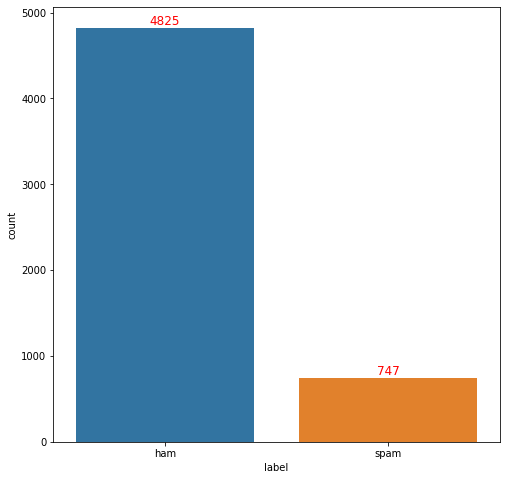

In [199]:
plt.figure(figsize=(8,8))
count = sns.countplot(df['label'])
for p in count.patches:
  count.text(x=(p.get_x()+p.get_width()/2.0),y=p.get_height(),s=int(p.get_height()),
             ha='center',va='bottom',fontsize=12,color='red')
  


In [200]:
dist = df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
dist.style.background_gradient(cmap='Dark2_r')


,label,text
0,ham,4825
1,spam,747


In [201]:
4825/(747+4825)

0.8659368269921034

The dataset is imbalanced, 86% of the dataset are ham (i.e) 4825 and the rest 747 are spam.

In [202]:
fig = go.Figure(data=[
                      go.Pie(values=dist['text'],labels=dist['label'],pull=[0,0.2])
])
fig.update_layout(title='Spam Ham Distribution')
fig.show()

<a id='item4'></a>

##4.Data Preprocessing

Lets clean the text

In [0]:
def cleanText(text):
  ''' lower the text, remove links, remove words containing numbers, remove emojis,remove punctuation, remove stopwords'''
  text = text.lower()
  text = re.sub('https:\S+',"",text)
  text = re.sub('\w*\d\w*', '', text)
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
  text =  emoji_pattern.sub(r'', text)
  text = ''.join([char for char in text if char not in string.punctuation +'£'])
  return  ' '.join([word for word in text.split() if word not in set(stopwords.words('english')+ ['u','å', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','£'])])


In [0]:
df['clean_text'] = df['text'].apply(cleanText)

In [205]:
df.head()

,label,text,label_num,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,0,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


Lets add metafeatures

In [0]:
df['text_len'] = df['clean_text'].apply(len)

In [207]:
df.head()

,label,text,label_num,clean_text,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts may...,98
3,ham,U dun say so early hor... U c already then say...,0,dun say early hor c already say,31
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though,38


In [208]:

fig = px.histogram(df,x='text_len',y='label',color='label')
fig.show()

The ham texts have more characters than spam

In [209]:
df[df['label']=='ham'].describe()

,label_num,text_len
count,4825.0,4825.000000
mean,0.0,44.184249
std,0.0,36.837867
min,0.0,0.000000
25%,0.0,20.000000
50%,0.0,33.000000
75%,0.0,58.000000
max,0.0,511.000000


In [210]:
df[df['label']=='spam'].describe()

,label_num,text_len
count,747.0,747.000000
mean,1.0,81.038822
std,0.0,21.505092
min,1.0,0.000000
25%,1.0,70.000000
50%,1.0,83.000000
75%,1.0,96.000000
max,1.0,144.000000


In [211]:
min(df['text_len'])

0

In [212]:
df[df['text_len']==0]

,label,text,label_num,clean_text,text_len
959,ham,Where @,0,,0
1552,ham,U too...,0,,0
1611,ham,645,0,,0
2805,ham,Can a not?,0,,0
3374,ham,:),0,,0
3740,spam,2/2 146tf150p,1,,0
4573,ham,:( but your not here....,0,,0
4822,ham,:-) :-),0,,0
4854,ham,Same to u...,0,,0
4885,ham,Or just do that 6times,0,,0


After cleaning the text, there are few empty texts, lets remove it

In [213]:
df[df['text_len']==0]

,label,text,label_num,clean_text,text_len
959,ham,Where @,0,,0
1552,ham,U too...,0,,0
1611,ham,645,0,,0
2805,ham,Can a not?,0,,0
3374,ham,:),0,,0
3740,spam,2/2 146tf150p,1,,0
4573,ham,:( but your not here....,0,,0
4822,ham,:-) :-),0,,0
4854,ham,Same to u...,0,,0
4885,ham,Or just do that 6times,0,,0


In [0]:
df.drop(df[df['text_len']==0].index,inplace=True)

<a id='item5'></a>

##5.WordCloud

Checking the most common words for ham and spam texts

In [215]:
hamWordsList = df[df['label']=='ham'].clean_text.apply(lambda x: x.split())
ham_common = Counter([word for lis in hamWordsList for word in lis])
ham_df = pd.DataFrame(ham_common.most_common(20),columns={'Words','Count'})
ham_df.style.background_gradient(cmap='Reds')


,Count,Words
0,get,303
1,ltgt,276
2,ok,273
3,go,250
4,ill,238
5,got,232
6,know,232
7,like,231
8,call,231
9,come,227


In [216]:
spamListWords = df[df['label']=='spam'].clean_text.apply(lambda x:str(x).split())
spam_common = Counter([word for lis in spamListWords for word in lis])
spam_df = pd.DataFrame(spam_common.most_common(20),columns=['Word','Count'])
spam_df.style.background_gradient(cmap='Blues')

,Word,Count
0,call,348
1,free,217
2,txt,154
3,mobile,123
4,text,121
5,stop,115
6,claim,113
7,reply,101
8,prize,92
9,get,83


Lets plot Wordcloud

In [217]:
!wget https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png

--2020-05-14 13:21:43--  https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51818 (51K) [image/png]
Saving to: ‘twitter_mask.png.1’

twitter_mask.png.1  100%[===================>]  50.60K  --.-KB/s    in 0.02s   

2020-05-14 13:21:44 (1.99 MB/s) - ‘twitter_mask.png.1’ saved [51818/51818]



In [0]:
def plot_wordcloud(text,title):
  mask = np.array(Image.open('twitter_mask.png'))
  wordcloud = WordCloud(width=400,height=400,background_color='white',mask=mask,stopwords=set(STOPWORDS),min_font_size=12).generate(str(text))
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.title(title,fontdict={'size':20,'color':'black'})
  plt.show()

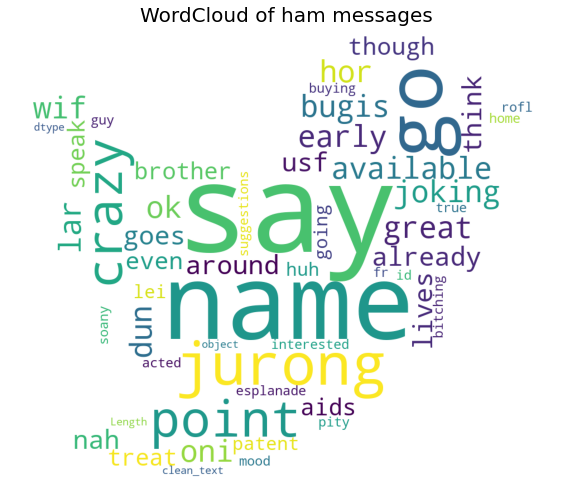

In [219]:
plot_wordcloud(df[df['label']=='ham'].clean_text,'WordCloud of ham messages')

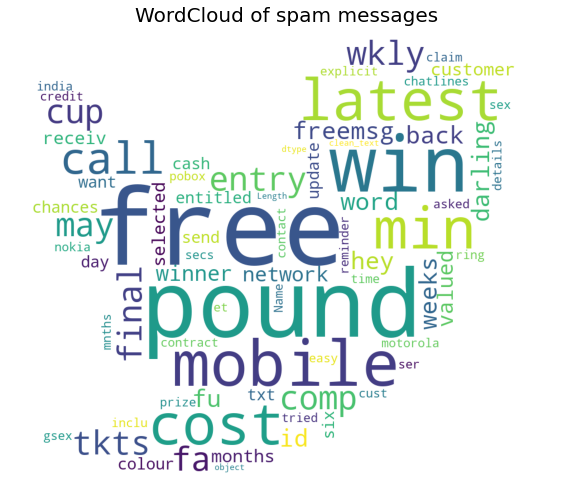

In [220]:
plot_wordcloud(df[df['label']=='spam'].clean_text,'WordCloud of spam messages')

<a id ='item6'></a>

##6.Modelling uisng ML Algorithms

In [0]:
y = df['label_num'].values
X= df['clean_text'].values

In [0]:
clfs = [MultinomialNB(),LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]

In [0]:
def performModel(X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
  for clf in clfs:
    model_name = clf.__class__.__name__
    clf.fit(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    train_score = clf.score(X_train,y_train)
    print(model_name +f' Train Score:{train_score:.2f} Test Score:{test_score:.2f}')

In [224]:
cv = CountVectorizer()
cv_x=cv.fit_transform(X)
performModel(cv_x,y)

MultinomialNB Train Score:0.99 Test Score:0.97
LogisticRegression Train Score:0.99 Test Score:0.98
SVC Train Score:1.00 Test Score:0.98
DecisionTreeClassifier Train Score:1.00 Test Score:0.97
RandomForestClassifier Train Score:1.00 Test Score:0.97
AdaBoostClassifier Train Score:0.97 Test Score:0.96


In [225]:
tf_idf = TfidfVectorizer()
tfidf_x = tf_idf.fit_transform(X)
performModel(tfidf_x,y)

MultinomialNB Train Score:0.97 Test Score:0.96
LogisticRegression Train Score:0.96 Test Score:0.95
SVC Train Score:1.00 Test Score:0.98
DecisionTreeClassifier Train Score:1.00 Test Score:0.96
RandomForestClassifier Train Score:1.00 Test Score:0.98
AdaBoostClassifier Train Score:0.97 Test Score:0.96


In [226]:
tf = TfidfTransformer()
tf_x = tf.fit_transform(cv_x)
performModel(tf_x,y)

MultinomialNB Train Score:0.97 Test Score:0.96
LogisticRegression Train Score:0.96 Test Score:0.95
SVC Train Score:1.00 Test Score:0.98
DecisionTreeClassifier Train Score:1.00 Test Score:0.96
RandomForestClassifier Train Score:1.00 Test Score:0.98
AdaBoostClassifier Train Score:0.97 Test Score:0.96


All the models have performed similarly

Lets use RandomForestClassifier for the final traning.

In [0]:
pipeline = Pipeline([('tfidf',TfidfVectorizer()),
                     ('model',RandomForestClassifier())])

In [228]:
accuracy=[]
sk = StratifiedKFold(n_splits=10,random_state=None)
for train_index, test_index in sk.split(X,y):
  X_train, X_test = X[train_index],X[test_index]
  y_train,y_test = y[train_index],y[test_index]
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred))



Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [229]:
accuracy

[0.9874326750448833,
 0.9748201438848921,
 0.9712230215827338,
 0.9730215827338129,
 0.9712230215827338,
 0.9802158273381295,
 0.9712230215827338,
 0.9766187050359713,
 0.9694244604316546,
 0.9784172661870504]

In [230]:
print(f'The minimum accuracy :{min(accuracy):.2f}, maximum accuracy :{max(accuracy):.2f}, average accuracy:{np.mean(accuracy):.2f}')

The minimum accuracy :0.97, maximum accuracy :0.99, average accuracy:0.98


In [0]:
def findBestHyperParams(est,params,X,y):
  ranCV = RandomizedSearchCV(est,param_distributions=params,n_iter=10,n_jobs=-1,cv=5)
  ranCV.fit(X,y)
  return ranCV.best_params_, ranCV.best_score_

In [0]:
params={'n_estimators':[100,200,300,400,500],
        'criterion':['gini','entropy'],
        'max_depth':[3,5,10,None],
        'bootstrap':[True,False],
        'min_samples_leaf':[np.random.randint(1,4)]
        }

In [0]:
bestParams, bestScore = findBestHyperParams(RandomForestClassifier(),params,tf_x,y)

In [234]:
bestParams

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [0]:
 X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
 

In [236]:
model = Pipeline([('tfidf',TfidfVectorizer()),
                     ('model',RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=None,min_samples_leaf=2,n_estimators=400))
                     ])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=

In [0]:
def calMetrics(y_test,y_pred):
  cf = confusion_matrix(y_test,y_pred)
  sns.heatmap(cf,cmap='RdYlGn',annot=True)
  plt.show()

  print(classification_report(y_test,y_pred))
  print(f'Accuracy Score :{accuracy_score(y_test,y_pred):.2f}')

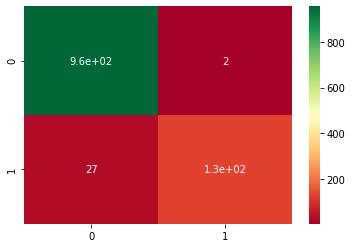

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       958
           1       0.98      0.83      0.90       155

    accuracy                           0.97      1113
   macro avg       0.98      0.91      0.94      1113
weighted avg       0.97      0.97      0.97      1113

Accuracy Score :0.97


In [238]:
calMetrics(y_test,y_pred)

Checking the False Positive Texts - Ham incorectly classified

In [239]:
X_test[y_pred>y_test]

array(['total video converter free download type google search',
       'purchase stuff today mail po box number'], dtype=object)

Checking the False Negative Texts - Spam incorrectly classified

In [240]:
X_test[y_pred<y_test]

array(['donate unicefs asian tsunami disaster support fund texting donate added next bill',
       'new message call',
       'email alertfrom jeri stewartsize lowcost prescripiton drvgsto listen email call',
       'want explicit sex secs ring costs min',
       'claire havin borin time alone wanna cum chat hope c luv claire xx callså',
       'cost',
       'tonexs subscription renewed charged choose polys month wwwclubzedcouk billing msg',
       'got takes take part wrc rally oz lucozade energy text rally le see packs lucozadecoukwrc itcould',
       'text banneduk see cost textoperator xxx',
       'new voicemail please call',
       'enjoy jamster videosound gold club credits new videosounds logosmusicnews get fun jamstercouk help call',
       'hi babe chloe r smashed saturday night great weekend missing sp visionsmscom text stop stop text',
       'balance next question complete landmark big bob b barry c ben text b c good luck',
       'new club fink met yet b c please leave m

<a id='item7'></a>

##7.Model using Deep Learning

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM, Dropout,Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import layers


In [0]:
oov= '<oov>'
max_len = max(df['text_len'])
padding ='pre'
trun='pre'

In [243]:
type(X)

numpy.ndarray

In [0]:
tokenizer = Tokenizer(oov_token=oov)
#create vocabulary
tokenizer.fit_on_texts(list(X))
word_index = tokenizer.word_index

#transform each text in to integers
text_sequence = tokenizer.texts_to_sequences(list(X))
text_padded = pad_sequences(text_sequence,maxlen=17,padding=padding,truncating=trun)

In [245]:

embedding_dim = 128
corpus_size =len(word_index)+1
corpus_size


8299

In [0]:
emb_lay = Embedding(input_dim=corpus_size, output_dim=embedding_dim, input_length=3)
model = Sequential([emb_lay,
                    tf.keras.layers.SpatialDropout1D(0.2),
                    Bidirectional(LSTM(64,return_sequences=True)),
                    Bidirectional(LSTM(34,return_sequences=True)),
                    
                    Dense(5,'relu'),
                    Dropout(0.2),
                    Dense(1,'sigmoid')
                    ])
model.compile(optimizer=RMSprop(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(text_padded,y,test_size=0.3,random_state=42)

In [280]:
X_train.shape,y_train.shape

((3892, 17), (3892,))

In [0]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs=None):
    if logs['accuracy'] and logs['val_accuracy'] >=0.99:
      self.stop.model_training = True
      print('Model has reached 99% accuracy')

In [292]:
EPOCHS=10
lrReduce = ReduceLROnPlateau(factor=0.1,monitor='val_accuracy',patience=1,min_delta=0.00001,verbose=1)
earlyStopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00001)
history = model.fit(X_train,y_train,epochs=EPOCHS, batch_size=128, validation_split=0.2,callbacks=[lrReduce,MyCallback()])

Epoch 1/10
25/25 [==============================] - 2s 99ms/step - loss: 0.2287 - accuracy: 0.9145 - val_loss: 0.7300 - val_accuracy: 0.6931 - lr: 0.0100
Epoch 2/10
25/25 [==============================] - 1s 35ms/step - loss: 0.0965 - accuracy: 0.9537 - val_loss: 0.1126 - val_accuracy: 0.9780 - lr: 0.0100
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9816
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
25/25 [==============================] - 1s 34ms/step - loss: 0.0319 - accuracy: 0.9816 - val_loss: 0.1382 - val_accuracy: 0.9724 - lr: 0.0100
Epoch 4/10
25/25 [==============================] - 1s 35ms/step - loss: 0.0235 - accuracy: 0.9979 - val_loss: 0.1418 - val_accuracy: 0.9781 - lr: 1.0000e-03
Epoch 5/10
25/25 [==============================] - 1s 35ms/step - loss: 0.0191 - accuracy: 0.9980 - val_loss: 0.1651 - val_accuracy: 0.9788 - lr: 1.0000e-03
Epoch 6/10
25/25 [==============================] - ETA: 0s

In [294]:
loss, accuracy =model.evaluate(X_test,y_test)

53/53 [==============================] - 1s 10ms/step - loss: 0.1254 - accuracy: 0.9840


In [296]:
print(f'Test accuracy:{accuracy:.2f}')

Test accuracy:0.98
